## Load the Data

In [1]:
import pandas as pd

In [2]:
courier_wave = pd.read_csv('courier_wave_info_meituan.csv')

In [3]:
all_waybill_df = pd.read_csv('all_waybill_info_meituan_0322.csv')

In [4]:
dispatch_waybill_df = pd.read_csv('dispatch_waybill_meituan.csv')

In [5]:
dispatch_rider_df = pd.read_csv('dispatch_rider_meituan.csv')

## Understand the data

In [6]:
all_waybill_df.columns

Index(['Unnamed: 0', 'dt', 'order_id', 'waybill_id', 'courier_id', 'da_id',
       'is_courier_grabbed', 'is_weekend', 'estimate_arrived_time',
       'is_prebook', 'poi_id', 'sender_lng', 'sender_lat', 'recipient_lng',
       'recipient_lat', 'grab_lng', 'grab_lat', 'dispatch_time', 'grab_time',
       'fetch_time', 'arrive_time', 'estimate_meal_prepare_time',
       'order_push_time', 'platform_order_time'],
      dtype='object')

### Understand the dispatch_rider_df dataframe

In [7]:
dispatch_unix_timestamps = dispatch_rider_df['dispatch_time'].unique()

In [8]:
import datetime

# Example array of Unix timestamps
# unix_timestamps = [1672531200, 1672617600, 1672704000]

# Convert each timestamp to actual time
actual_times = [datetime.datetime.fromtimestamp(ts) for ts in dispatch_unix_timestamps]

# Print the results
for i, actual_time in enumerate(actual_times, 1):
    print(f"Actual Time {i}: {actual_time}")


Actual Time 1: 2022-10-17 05:25:14
Actual Time 2: 2022-10-17 05:27:14
Actual Time 3: 2022-10-17 05:30:14
Actual Time 4: 2022-10-18 05:25:06
Actual Time 5: 2022-10-18 05:27:06
Actual Time 6: 2022-10-18 05:30:06
Actual Time 7: 2022-10-19 05:25:13
Actual Time 8: 2022-10-19 05:27:13
Actual Time 9: 2022-10-19 05:30:13
Actual Time 10: 2022-10-20 05:25:12
Actual Time 11: 2022-10-20 05:27:12
Actual Time 12: 2022-10-20 05:30:12
Actual Time 13: 2022-10-21 05:25:07
Actual Time 14: 2022-10-21 05:27:07
Actual Time 15: 2022-10-21 05:30:07
Actual Time 16: 2022-10-22 05:25:10
Actual Time 17: 2022-10-22 05:27:10
Actual Time 18: 2022-10-22 05:30:10
Actual Time 19: 2022-10-23 05:25:19
Actual Time 20: 2022-10-23 05:27:19
Actual Time 21: 2022-10-23 05:30:19
Actual Time 22: 2022-10-24 05:25:17
Actual Time 23: 2022-10-24 05:27:17
Actual Time 24: 2022-10-24 05:30:17


In [9]:
# Group by 'dispatch_time' and count distinct 'courier_id'
distinct_courier_counts = (
    dispatch_rider_df.groupby('dispatch_time')['courier_id']
    .nunique()
    .reset_index(name='distinct_courier_count')
)

# Print the result
print(distinct_courier_counts)


    dispatch_time  distinct_courier_count
0      1665977114                    2503
1      1665977234                    2557
2      1665977414                    2571
3      1666063506                    2530
4      1666063626                    2570
5      1666063806                    2572
6      1666149913                    2595
7      1666150033                    2636
8      1666150213                    2644
9      1666236312                    2613
10     1666236432                    2677
11     1666236612                    2680
12     1666322707                    2604
13     1666322827                    2653
14     1666323007                    2654
15     1666409110                    2566
16     1666409230                    2607
17     1666409410                    2625
18     1666495519                    2511
19     1666495639                    2549
20     1666495819                    2550
21     1666581917                    2482
22     1666582037                 

In [10]:
distinct_courier_counts['distinct_courier_count'].mean()

2585.1666666666665

Technical Insights:
1. Dispatch happens only 3 times a day at 6:25, 6:27, 6:30
2. There is an average of 2585 couriers during each dispatch cycle

### Understand the dispatch_waybill_df dataframe

In [11]:
dispatch_waybill_df['dispatch_time'].nunique()

24

In [12]:
unix_timestamps = dispatch_waybill_df['dispatch_time'].unique()

In [13]:
actual_times = [datetime.datetime.fromtimestamp(ts) for ts in unix_timestamps]

# Print the results
for i, actual_time in enumerate(actual_times, 1):
    print(f"Actual Time {i}: {actual_time}")


Actual Time 1: 2022-10-17 05:25:14
Actual Time 2: 2022-10-17 05:27:14
Actual Time 3: 2022-10-17 05:30:14
Actual Time 4: 2022-10-18 05:25:06
Actual Time 5: 2022-10-18 05:27:06
Actual Time 6: 2022-10-18 05:30:06
Actual Time 7: 2022-10-19 05:25:13
Actual Time 8: 2022-10-19 05:27:13
Actual Time 9: 2022-10-19 05:30:13
Actual Time 10: 2022-10-20 05:25:12
Actual Time 11: 2022-10-20 05:27:12
Actual Time 12: 2022-10-20 05:30:12
Actual Time 13: 2022-10-21 05:25:07
Actual Time 14: 2022-10-21 05:27:07
Actual Time 15: 2022-10-21 05:30:07
Actual Time 16: 2022-10-22 05:25:10
Actual Time 17: 2022-10-22 05:27:10
Actual Time 18: 2022-10-22 05:30:10
Actual Time 19: 2022-10-23 05:25:19
Actual Time 20: 2022-10-23 05:27:19
Actual Time 21: 2022-10-23 05:30:19
Actual Time 22: 2022-10-24 05:25:17
Actual Time 23: 2022-10-24 05:27:17
Actual Time 24: 2022-10-24 05:30:17


In [14]:
# check if unix_timestamps has the same values as dispatch_unix_timestamps
set(unix_timestamps) == set(dispatch_unix_timestamps)

True

In [15]:
# Group by 'dispatch_time' and count distinct 'order_id'
distinct_order_counts = (
    dispatch_waybill_df.groupby('dispatch_time')['order_id']
    .nunique()
    .reset_index(name='distinct_order_count')
)

# Print the result
print(distinct_order_counts)


    dispatch_time  distinct_order_count
0      1665977114                   658
1      1665977234                   624
2      1665977414                   634
3      1666063506                   710
4      1666063626                   645
5      1666063806                   615
6      1666149913                   715
7      1666150033                   721
8      1666150213                   638
9      1666236312                   643
10     1666236432                   687
11     1666236612                   691
12     1666322707                   733
13     1666322827                   684
14     1666323007                   663
15     1666409110                   700
16     1666409230                   672
17     1666409410                   634
18     1666495519                   634
19     1666495639                   591
20     1666495819                   669
21     1666581917                   650
22     1666582037                   702
23     1666582217                   608


In [16]:
distinct_order_counts['distinct_order_count'].mean()

663.375

Technical Insights:
1. There is an average of 663 orders during each dispatch cycle
2. The dataset visits the system dynamics only at 24 timepoints (3 times per day for 8 days)

### Understand the courier wave dataframe

In [17]:
courier_wave.columns

Index(['dt', 'courier_id', 'wave_id', 'wave_start_time', 'wave_end_time',
       'order_ids'],
      dtype='object')

In [18]:
# Group by 'dt' and 'courier_id' and count unique 'wave_id'
unique_wave_counts = (
    courier_wave.groupby(['dt', 'courier_id'])['wave_id']
    .nunique()
    .reset_index(name='unique_wave_count')
)

# Print the result
print(unique_wave_counts)

             dt  courier_id  unique_wave_count
0      20221017           0                  2
1      20221017           1                  2
2      20221017           2                  9
3      20221017           3                  5
4      20221017           4                 21
...         ...         ...                ...
28918  20221024        4903                  2
28919  20221024        4912                  1
28920  20221024        4941                  1
28921  20221024        4942                  1
28922  20221024        4954                  1

[28923 rows x 3 columns]


In [19]:
conv_courier_wave = courier_wave.copy()

In [20]:
# Convert Unix timestamps to actual datetime for 'wave_start_time' and 'wave_end_time'
conv_courier_wave['wave_start_time'] = pd.to_datetime(conv_courier_wave['wave_start_time'], unit='s')
conv_courier_wave['wave_end_time'] = pd.to_datetime(conv_courier_wave['wave_end_time'], unit='s')

In [21]:
courier_wave['order_ids']
# find the length of all order_ids
(courier_wave['order_ids'].str.len()).max()


467

467 because it is inferred as a string not a list (467 is the number of characters)

In [22]:

# find the index of the longest list of order_ids
courier_wave['order_ids'].str.len().idxmax()


24448

In [23]:
ex_list = [403712, 457089, 287750, 29191, 368392, 498698, 206863, 76690, 324117, 298907, 147100, 150045, 307483, 200864, 379297, 501285, 335142, 504105, 522282, 89261, 563631, 326832, 104625, 392883, 125749, 419766, 125752, 270649, 195003, 156092, 165439, 365765, 395466, 113866, 147148, 548299, 478155, 522191, 548179, 209877, 348892, 483168, 462177, 456933, 548197, 153191, 279397, 310374, 67431, 262128, 433008, 566256, 80113, 267764, 498677, 209912, 141050, 467582, 379391]

In [24]:
len(ex_list)

59

## Feature Engineering

In [25]:
all_waybill_df_copy = all_waybill_df.copy()

In [26]:
courier_wave_copy = courier_wave.copy()

### Create Derived Features

1. Order-Courier Distance: Calculate the haversine distance between courier and pickup points.
2. Courier Workload: Count active orders for each courier.
3. Temporal Features: Extract features like hour_of_day

In [27]:
import numpy as np
from math import radians, cos, sin, sqrt, atan2

# Haversine distance calculation function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Feature 1:
# Haversine distance for order and courier
all_waybill_df['pickup_to_courier_distance'] = all_waybill_df.apply(
    lambda row: haversine(
        row['sender_lat'] / 1e6, row['sender_lng'] / 1e6,
        row['grab_lat'] / 1e6, row['grab_lng'] / 1e6
    ) if row['grab_lat'] > 0 and row['grab_lng'] > 0 else np.nan,
    axis=1
)

In [28]:
# # Feature 2:

# # Convert timestamps to datetime for easier manipulation
# all_waybill_df['dispatch_time'] = pd.to_datetime(all_waybill_df['dispatch_time'], unit='s')
# courier_wave['wave_start_time'] = pd.to_datetime(courier_wave['wave_start_time'], unit='s')
# courier_wave['wave_end_time'] = pd.to_datetime(courier_wave['wave_end_time'], unit='s')


# # Initialize an empty column for active orders
# all_waybill_df['active_orders'] = 0

# # Iterate over each row in all_waybill_df
# for index, row in all_waybill_df.iterrows():
#     courier_id = row['courier_id']
#     dt = row['dt']  # Assuming `dt` is in the same format in both datasets
#     dispatch_time = row['dispatch_time']

#     # Filter courier_wave_df for matching courier_id and date
#     courier_wave = courier_wave[(courier_wave['courier_id'] == courier_id) & 
#                                    (courier_wave['dt'] == dt)]

#     # Find the wave where dispatch_time falls within wave_start_time and wave_end_time
#     wave = courier_wave[
#         (courier_wave['wave_start_time'] <= dispatch_time) & 
#         (courier_wave['wave_end_time'] >= dispatch_time)
#     ]

#     if not wave.empty:
#         # Extract the list of order_ids for the matching wave
#         order_ids = wave.iloc[0]['order_ids']  # Assuming this is a string of order IDs
#         # Convert order_ids to a list and count the number of orders
#         order_list = eval(order_ids) if isinstance(order_ids, str) else []
#         all_waybill_df.at[index, 'active_orders'] = len(order_list)


In [29]:
#dump waybill data to csv
all_waybill_df.to_csv('all_waybill_new.csv', index=False)

In [30]:
print("all_waybill_df columns:", all_waybill_df.columns)
print("courier_wave_df columns:", courier_wave.columns)


all_waybill_df columns: Index(['Unnamed: 0', 'dt', 'order_id', 'waybill_id', 'courier_id', 'da_id',
       'is_courier_grabbed', 'is_weekend', 'estimate_arrived_time',
       'is_prebook', 'poi_id', 'sender_lng', 'sender_lat', 'recipient_lng',
       'recipient_lat', 'grab_lng', 'grab_lat', 'dispatch_time', 'grab_time',
       'fetch_time', 'arrive_time', 'estimate_meal_prepare_time',
       'order_push_time', 'platform_order_time', 'pickup_to_courier_distance'],
      dtype='object')
courier_wave_df columns: Index(['dt', 'courier_id', 'wave_id', 'wave_start_time', 'wave_end_time',
       'order_ids'],
      dtype='object')


In [31]:
# Load data
# all_waybill_df = pd.read_csv('all_waybill_info_meituan.csv')
# courier_wave_df = pd.read_csv('courier_wave_info_meituan.csv')

# Convert timestamps to datetime
all_waybill_df['dispatch_time'] = pd.to_datetime(all_waybill_df['dispatch_time'], unit='s')
courier_wave['wave_start_time'] = pd.to_datetime(courier_wave['wave_start_time'], unit='s')
courier_wave['wave_end_time'] = pd.to_datetime(courier_wave['wave_end_time'], unit='s')

# Add a unique key for merging (courier_id and date)
all_waybill_df['courier_dt'] = all_waybill_df['courier_id'].astype(str) + "_" + all_waybill_df['dt'].astype(str)
courier_wave['courier_dt'] = courier_wave['courier_id'].astype(str) + "_" + courier_wave['dt'].astype(str)

# # Merge all_waybill_df with courier_wave_df on courier_dt
# merged_df = pd.merge(all_waybill_df, courier_wave, on='courier_dt', suffixes=('_order', '_wave'))

# # Filter rows where dispatch_time is within the wave time range
# merged_df = merged_df[
#     (merged_df['dispatch_time'] >= merged_df['wave_start_time']) &
#     (merged_df['dispatch_time'] <= merged_df['wave_end_time'])
# ]

# # Count active orders from the order_ids field
# # Convert order_ids from string to list and calculate the length
# merged_df['active_orders'] = merged_df['order_ids'].apply(
#     lambda x: len(eval(x)) if isinstance(x, str) else 0
# )

# # Drop duplicates to avoid assigning the same active_orders multiple times
# result_df = merged_df[['dispatch_time', 'courier_id', 'active_orders']].drop_duplicates()

# # Merge back active orders into the original DataFrame
# all_waybill_df = pd.merge(all_waybill_df, result_df, on=['courier_id', 'dispatch_time'], how='left')

# # Fill NaN values in active_orders with 0 (for dispatch times not in any wave)
# all_waybill_df['active_orders'] = all_waybill_df['active_orders'].fillna(0).astype(int)

# # Save the updated dataset
# all_waybill_df.to_csv('all_waybill_with_active_orders_optimized.csv', index=False)

# # Check the results
# print(all_waybill_df[['courier_id', 'dispatch_time', 'active_orders']].head())


In [32]:
# Merge with specified suffixes to avoid column conflict
merged_df = pd.merge(
    all_waybill_df, 
    courier_wave, 
    on=['courier_dt'], 
    suffixes=('_order', '_wave'),  # Differentiates columns with same name
    how='inner'  # Ensures only matching rows are included
)

# Check the merged DataFrame
print("Columns in merged_df:", merged_df.columns)

# Ensure we are referencing the correct columns
dispatch_column = 'dispatch_time'  # Comes from all_waybill_df
courier_id_column = 'courier_id_order'  # courier_id from all_waybill_df
wave_start_column = 'wave_start_time'  # courier_wave_df
wave_end_column = 'wave_end_time'  # courier_wave_df

# Filter rows where dispatch_time is within the wave duration
merged_df = merged_df[
    (merged_df[dispatch_column] >= merged_df[wave_start_column]) &
    (merged_df[dispatch_column] <= merged_df[wave_end_column])
]

# Count active orders from the order_ids field
merged_df['active_orders'] = merged_df['order_ids'].apply(
    lambda x: len(eval(x)) if isinstance(x, str) else 0
)

# Keep only the necessary columns
result_df = merged_df[[dispatch_column, courier_id_column, 'active_orders']].drop_duplicates()

# Merge active_orders back into the original all_waybill_df
all_waybill_df = pd.merge(
    all_waybill_df, 
    result_df, 
    left_on=['courier_id', 'dispatch_time'], 
    right_on=[courier_id_column, dispatch_column], 
    how='left'
)

# Fill NaN values in active_orders with 0
all_waybill_df['active_orders'] = all_waybill_df['active_orders'].fillna(0).astype(int)

# Save the updated DataFrame
all_waybill_df.to_csv('all_waybill_with_active_orders_final.csv', index=False)

# Display sample rows for verification
print(all_waybill_df[['courier_id', 'dispatch_time', 'active_orders']].head())


Columns in merged_df: Index(['Unnamed: 0', 'dt_order', 'order_id', 'waybill_id', 'courier_id_order',
       'da_id', 'is_courier_grabbed', 'is_weekend', 'estimate_arrived_time',
       'is_prebook', 'poi_id', 'sender_lng', 'sender_lat', 'recipient_lng',
       'recipient_lat', 'grab_lng', 'grab_lat', 'dispatch_time', 'grab_time',
       'fetch_time', 'arrive_time', 'estimate_meal_prepare_time',
       'order_push_time', 'platform_order_time', 'pickup_to_courier_distance',
       'courier_dt', 'dt_wave', 'courier_id_wave', 'wave_id',
       'wave_start_time', 'wave_end_time', 'order_ids'],
      dtype='object')
   courier_id       dispatch_time  active_orders
0           0 2022-10-16 16:04:18              0
1           1 2022-10-16 16:12:14              0
2           2 2022-10-16 16:24:44              0
3           3 2022-10-16 16:23:14              0
4           4 2022-10-16 16:23:14              0


In [33]:
# Feature 3:
# Temporal features
all_waybill_df['hour_of_day'] = pd.to_datetime(all_waybill_df['platform_order_time'], unit='s').dt.hour

In [34]:
all_waybill_df.columns

Index(['Unnamed: 0', 'dt', 'order_id', 'waybill_id', 'courier_id', 'da_id',
       'is_courier_grabbed', 'is_weekend', 'estimate_arrived_time',
       'is_prebook', 'poi_id', 'sender_lng', 'sender_lat', 'recipient_lng',
       'recipient_lat', 'grab_lng', 'grab_lat', 'dispatch_time', 'grab_time',
       'fetch_time', 'arrive_time', 'estimate_meal_prepare_time',
       'order_push_time', 'platform_order_time', 'pickup_to_courier_distance',
       'courier_dt', 'courier_id_order', 'active_orders', 'hour_of_day'],
      dtype='object')

### Feature Scaling and Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Features to scale
scaler = MinMaxScaler()
all_waybill_df[['pickup_to_courier_distance', 'hour_of_day']] = scaler.fit_transform(
    all_waybill_df[['pickup_to_courier_distance', 'hour_of_day']]
)

all_waybill_df[['active_orders']] = scaler.fit_transform(
    all_waybill_df[['active_orders']]
)


## EDA

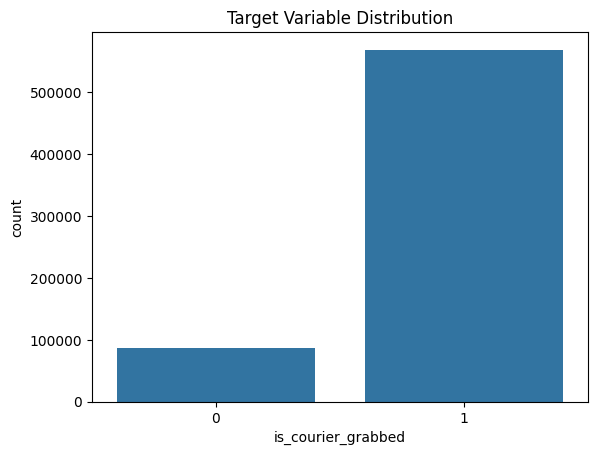

Target Variable Proportions:
 is_courier_grabbed
1    0.868881
0    0.131119
Name: proportion, dtype: float64


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable distribution
sns.countplot(x='is_courier_grabbed', data=all_waybill_df)
plt.title("Target Variable Distribution")
plt.show()

# Calculate proportions
target_proportions = all_waybill_df['is_courier_grabbed'].value_counts(normalize=True)
print("Target Variable Proportions:\n", target_proportions)


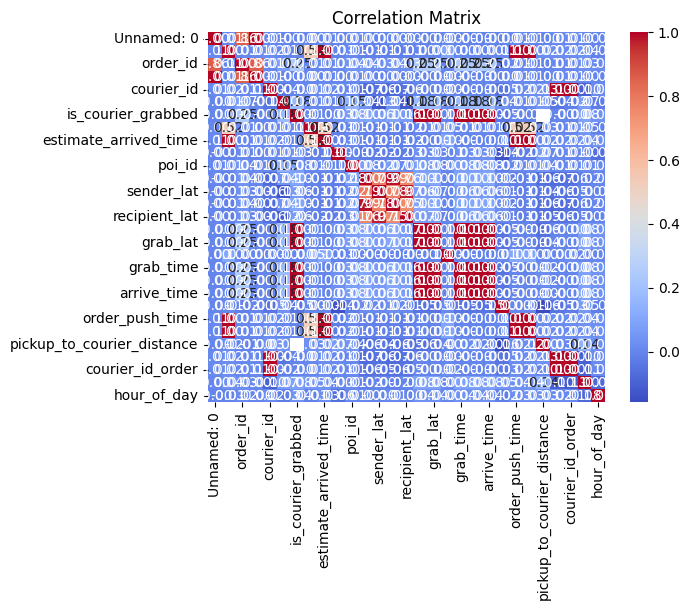

Correlation with Target Variable:
 is_courier_grabbed            1.000000
grab_time                     1.000000
fetch_time                    1.000000
grab_lng                      0.999999
grab_lat                      0.999995
arrive_time                   0.999993
order_id                      0.248659
da_id                         0.176045
recipient_lng                 0.099680
sender_lng                    0.098256
active_orders                 0.084216
poi_id                        0.076088
recipient_lat                 0.064154
sender_lat                    0.063593
hour_of_day                   0.036702
is_prebook                    0.029639
is_weekend                    0.007009
dt                            0.000408
order_push_time              -0.000474
estimate_arrived_time        -0.000501
dispatch_time                -0.000517
platform_order_time          -0.000541
waybill_id                   -0.000883
Unnamed: 0                   -0.000883
courier_dt                   

In [37]:
# Correlation heatmap
correlation_matrix = all_waybill_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation with target variable
target_correlation = correlation_matrix['is_courier_grabbed'].sort_values(ascending=False)
print("Correlation with Target Variable:\n", target_correlation)


In [38]:
all_waybill_df.columns

Index(['Unnamed: 0', 'dt', 'order_id', 'waybill_id', 'courier_id', 'da_id',
       'is_courier_grabbed', 'is_weekend', 'estimate_arrived_time',
       'is_prebook', 'poi_id', 'sender_lng', 'sender_lat', 'recipient_lng',
       'recipient_lat', 'grab_lng', 'grab_lat', 'dispatch_time', 'grab_time',
       'fetch_time', 'arrive_time', 'estimate_meal_prepare_time',
       'order_push_time', 'platform_order_time', 'pickup_to_courier_distance',
       'courier_dt', 'courier_id_order', 'active_orders', 'hour_of_day'],
      dtype='object')

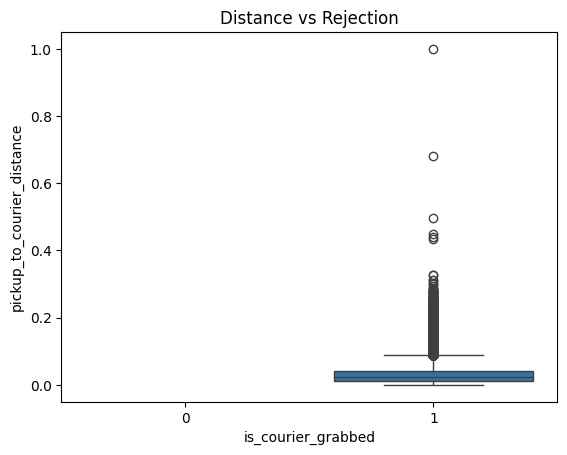

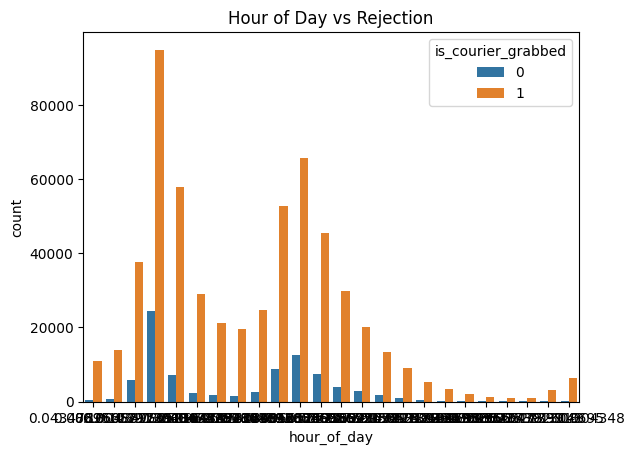

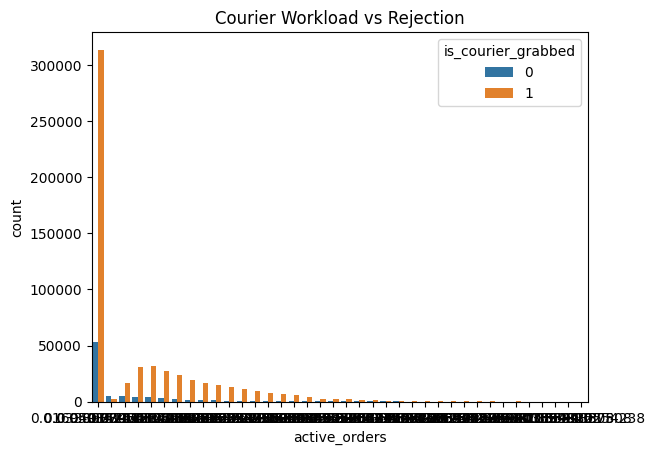

In [39]:
# Boxplot: Distance vs Rejection
sns.boxplot(x='is_courier_grabbed', y='pickup_to_courier_distance', data=all_waybill_df)
plt.title("Distance vs Rejection")
plt.show()

# Countplot: Hour of Day vs Rejection
sns.countplot(x='hour_of_day', hue='is_courier_grabbed', data=all_waybill_df)
plt.title("Hour of Day vs Rejection")
plt.show()

# Countplot: Courier Workload vs Rejection
sns.countplot(x='active_orders', hue='is_courier_grabbed', data=all_waybill_df)
plt.title("Courier Workload vs Rejection")
plt.show()


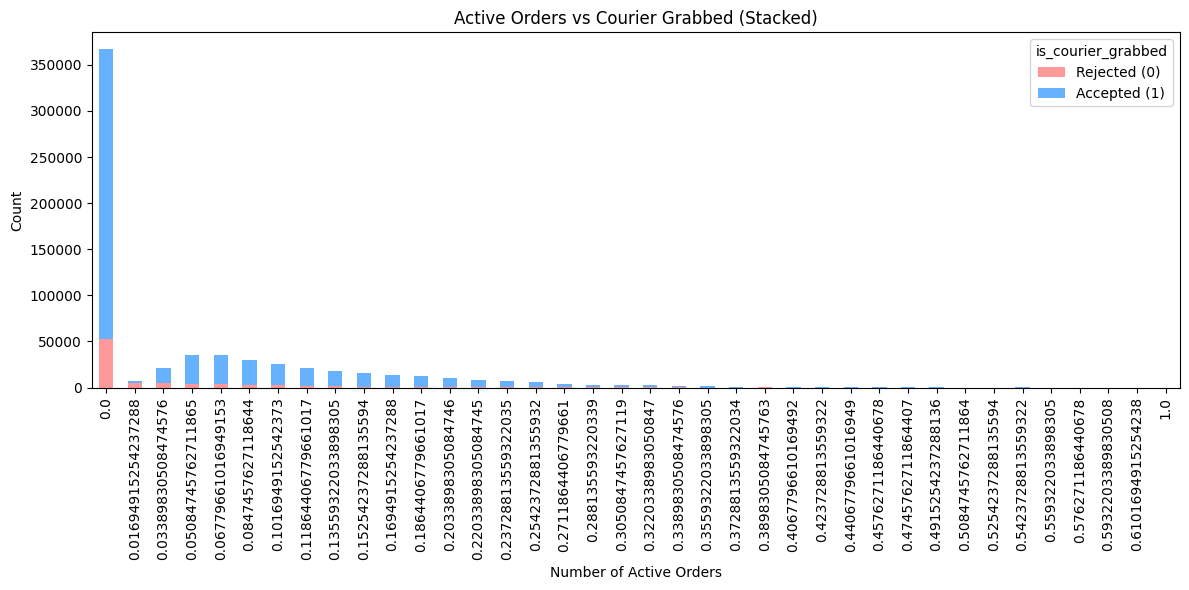

In [40]:
# Group by active_orders and is_courier_grabbed
active_orders_grouped = all_waybill_df.groupby(['active_orders', 'is_courier_grabbed']).size().reset_index(name='count')

# Pivot for stacked bar chart
active_orders_pivot = active_orders_grouped.pivot(index='active_orders', columns='is_courier_grabbed', values='count').fillna(0)

# Plot
active_orders_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FF9999', '#66B2FF'])
plt.title("Active Orders vs Courier Grabbed (Stacked)")
plt.xlabel("Number of Active Orders")
plt.ylabel("Count")
plt.legend(title='is_courier_grabbed', labels=['Rejected (0)', 'Accepted (1)'])
plt.tight_layout()
plt.show()


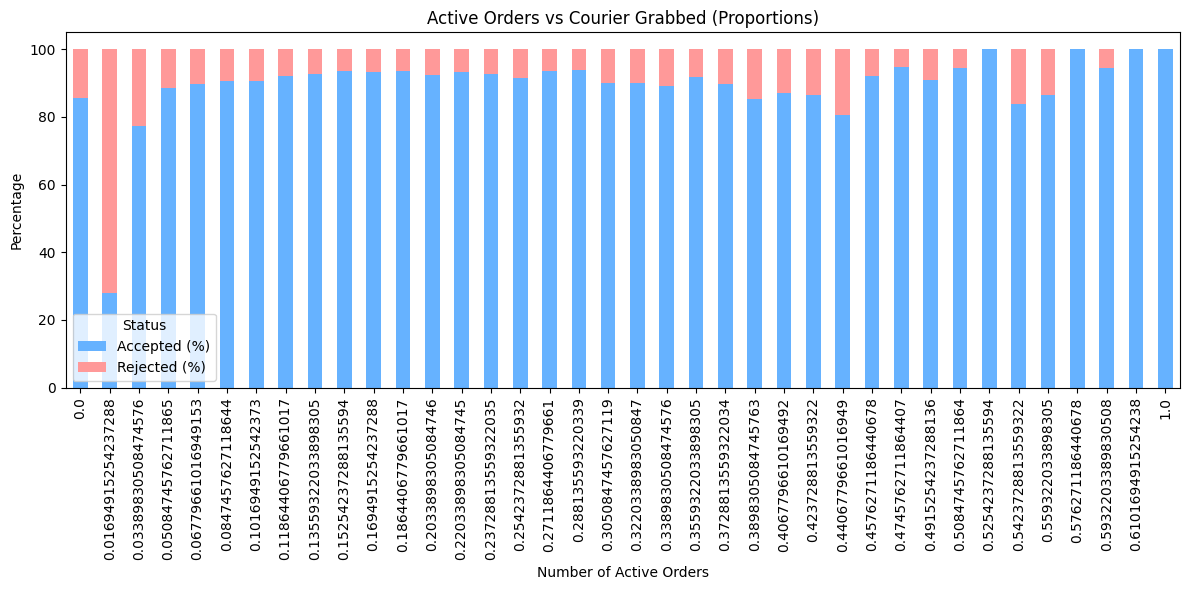

In [41]:
# Calculate proportions
active_orders_pivot['Total'] = active_orders_pivot.sum(axis=1)
active_orders_pivot['Accepted (%)'] = (active_orders_pivot[1] / active_orders_pivot['Total']) * 100
active_orders_pivot['Rejected (%)'] = (active_orders_pivot[0] / active_orders_pivot['Total']) * 100

# Plot proportions
active_orders_pivot[['Accepted (%)', 'Rejected (%)']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['#66B2FF', '#FF9999'])
plt.title("Active Orders vs Courier Grabbed (Proportions)")
plt.xlabel("Number of Active Orders")
plt.ylabel("Percentage")
plt.legend(title='Status')
plt.tight_layout()
plt.show()


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_3557896/3934460222.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_courier_grabbed', y='active_orders', data=all_waybill_df, palette='muted', split=True)


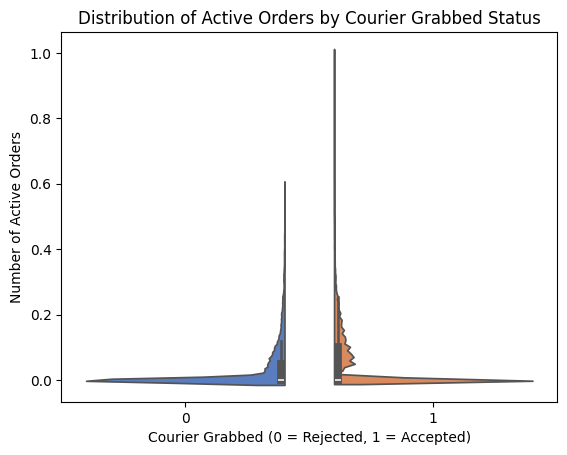

In [43]:
sns.violinplot(x='is_courier_grabbed', y='active_orders', data=all_waybill_df, palette='muted', split=True)
plt.title("Distribution of Active Orders by Courier Grabbed Status")
plt.xlabel("Courier Grabbed (0 = Rejected, 1 = Accepted)")
plt.ylabel("Number of Active Orders")
plt.show()


In [44]:
print(all_waybill_df['active_orders'].unique())

[0.         0.10169492 0.05084746 0.03389831 0.06779661 0.13559322
 0.08474576 0.20338983 0.11864407 0.16949153 0.3220339  0.15254237
 0.18644068 0.38983051 0.22033898 0.25423729 0.23728814 0.01694915
 0.37288136 0.42372881 0.27118644 0.33898305 0.54237288 0.30508475
 0.28813559 0.3559322  0.40677966 0.49152542 0.47457627 0.59322034
 0.45762712 0.52542373 0.55932203 0.61016949 0.44067797 0.50847458
 1.         0.57627119]


/tmp/ipykernel_3557896/2597339980.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='is_courier_grabbed', y='active_orders', data=all_waybill_df, jitter=True, alpha=0.6, palette='muted')


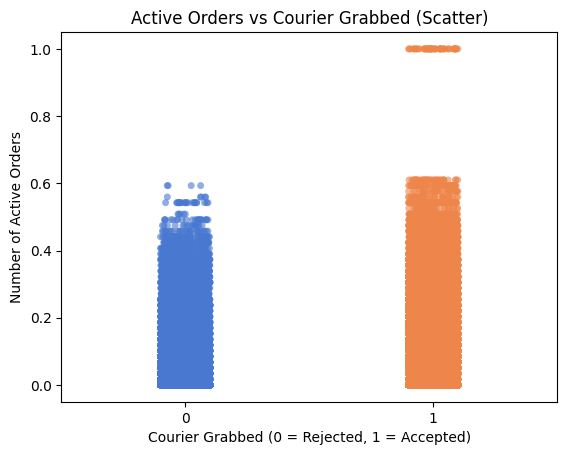

In [45]:
sns.stripplot(x='is_courier_grabbed', y='active_orders', data=all_waybill_df, jitter=True, alpha=0.6, palette='muted')
plt.title("Active Orders vs Courier Grabbed (Scatter)")
plt.xlabel("Courier Grabbed (0 = Rejected, 1 = Accepted)")
plt.ylabel("Number of Active Orders")
plt.show()


Optimization terminated successfully.
         Current function value: 0.384434
         Iterations 7


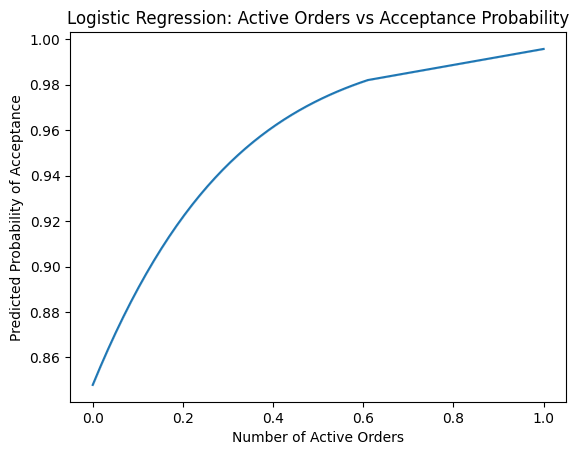

In [46]:
import numpy as np
import statsmodels.api as sm

# Fit logistic regression
X = sm.add_constant(all_waybill_df['active_orders'])
y = all_waybill_df['is_courier_grabbed']
model = sm.Logit(y, X)
result = model.fit()

# Predict probabilities
all_waybill_df['predicted_probability'] = result.predict(X)

# Plot
sns.lineplot(x='active_orders', y='predicted_probability', data=all_waybill_df)
plt.title("Logistic Regression: Active Orders vs Acceptance Probability")
plt.xlabel("Number of Active Orders")
plt.ylabel("Predicted Probability of Acceptance")
plt.show()


#### Updated Modeling

In [47]:
# Calculate historical rejection rate per courier
rejection_rate = all_waybill_df.groupby('courier_id')['is_courier_grabbed'].mean().reset_index()
rejection_rate.columns = ['courier_id', 'historical_acceptance_rate']


In [48]:
rejection_rate.columns

Index(['courier_id', 'historical_acceptance_rate'], dtype='object')

In [49]:

# Merge historical rejection rate back to the dataset
all_waybill_df = pd.merge(all_waybill_df, rejection_rate, on='courier_id', how='left')

# Calculate historical rejection rate
all_waybill_df['historical_rejection_rate'] = 1 - all_waybill_df['historical_acceptance_rate']


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Select features and target
X = all_waybill_df[['active_orders', 'hour_of_day', 'is_weekend', 'historical_rejection_rate']]
y = all_waybill_df['is_courier_grabbed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.71      0.51     17159
           1       0.95      0.84      0.89    113710

    accuracy                           0.82    130869
   macro avg       0.67      0.77      0.70    130869
weighted avg       0.88      0.82      0.84    130869

ROC-AUC Score: 0.8580066859958156


## More Feature Engineering

In [51]:
# Add peak hours indicator
all_waybill_df['peak_hours'] = all_waybill_df['hour_of_day'].apply(
    lambda x: 1 if 11 <= x <= 13 or 18 <= x <= 20 else 0
)

# Count active orders in the same area (da_id)
area_orders = all_waybill_df.groupby(['da_id', 'dispatch_time'])['order_id'].count().reset_index()
area_orders.columns = ['da_id', 'dispatch_time', 'active_area_orders']

# Merge back into the main dataframe
all_waybill_df = pd.merge(all_waybill_df, area_orders, on=['da_id', 'dispatch_time'], how='left')

# Fill NaN values for new features
all_waybill_df['active_area_orders'].fillna(0, inplace=True)


In [52]:
all_waybill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654343 entries, 0 to 654342
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  654343 non-null  int64         
 1   dt                          654343 non-null  int64         
 2   order_id                    654343 non-null  int64         
 3   waybill_id                  654343 non-null  int64         
 4   courier_id                  654343 non-null  int64         
 5   da_id                       654343 non-null  int64         
 6   is_courier_grabbed          654343 non-null  int64         
 7   is_weekend                  654343 non-null  int64         
 8   estimate_arrived_time       654343 non-null  int64         
 9   is_prebook                  654343 non-null  int64         
 10  poi_id                      654343 non-null  int64         
 11  sender_lng                  654343 non-

## Undersampling using Random UnderSampling

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Select features and target variable
# X = all_waybill_df[['active_orders', 'hour_of_day', 'is_weekend', 'historical_rejection_rate', 'da_id']]
X = all_waybill_df[['active_orders', 'hour_of_day', 'is_weekend', 'historical_rejection_rate', 
                    'da_id', 'peak_hours', 'active_area_orders']]
y = all_waybill_df['is_courier_grabbed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution before undersampling
print("Before Undersampling:")
print("Training set class distribution:", y_train.value_counts())

# Apply Random UnderSampler to the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Check class distribution after undersampling
print("After Undersampling:")
print("Training set class distribution:", y_train_under.value_counts())

Before Undersampling:
Training set class distribution: is_courier_grabbed
1    454836
0     68638
Name: count, dtype: int64
After Undersampling:
Training set class distribution: is_courier_grabbed
0    68638
1    68638
Name: count, dtype: int64


/tmp/ipykernel_3557896/1149079290.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_train_smote_df, x='is_courier_grabbed', palette='pastel')


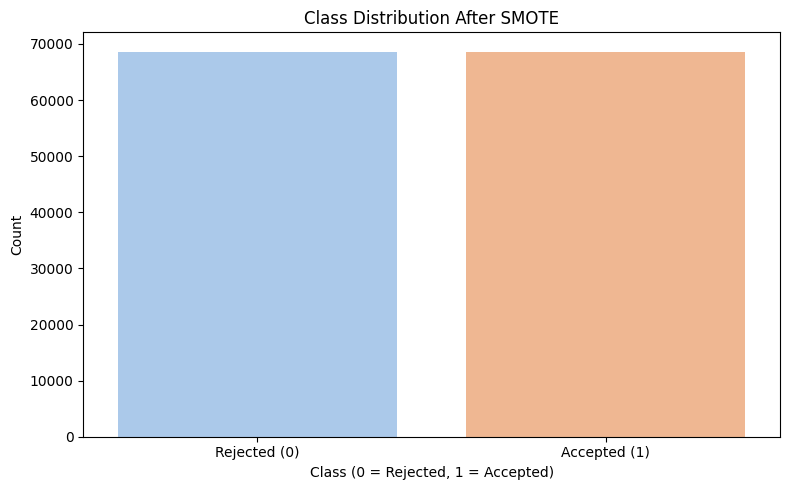

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert y_train_smote to a DataFrame for better visualization
y_train_smote_df = pd.DataFrame(y_train_under, columns=['is_courier_grabbed'])

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=y_train_smote_df, x='is_courier_grabbed', palette='pastel')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0 = Rejected, 1 = Accepted)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Rejected (0)', 'Accepted (1)'])
plt.tight_layout()
plt.show()


## Modeling Pt 2

##### RFR

In [57]:
# Train a Random Forest model with the undersampled dataset
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_under, y_train_under)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.84      0.49     17159
           1       0.97      0.76      0.85    113710

    accuracy                           0.77    130869
   macro avg       0.66      0.80      0.67    130869
weighted avg       0.89      0.77      0.80    130869

ROC-AUC Score: 0.885684709235742


##### XGBoost

In [58]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_under, label=y_train_under)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train XGBoost model
xgb_model = xgb.train(
    params={
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'scale_pos_weight': len(y_train_under[y_train_under == 1]) / len(y_train_under[y_train_under == 0]),
        'eta': 0.1,
        'max_depth': 6,
        'seed': 42
    },
    dtrain=dtrain,
    num_boost_round=100
)

# Predict probabilities
y_pred_xgb = xgb_model.predict(dtest)
y_pred_class_xgb = [1 if prob > 0.5 else 0 for prob in y_pred_xgb]

# Evaluate the model
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_class_xgb))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.86      0.47     17159
           1       0.97      0.73      0.83    113710

    accuracy                           0.75    130869
   macro avg       0.65      0.80      0.65    130869
weighted avg       0.89      0.75      0.78    130869

XGBoost ROC-AUC Score: 0.8813599681980352


##### LightGBM

In [62]:
import lightgbm as lgb

# Create LightGBM Dataset
train_data = lgb.Dataset(X_train_under, label=y_train_under)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'seed': 42
}

# Train LightGBM model
lgb_model = lgb.train(
    params=params,
    train_set=train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data],
    # early_stopping_rounds=10,
    # verbose_eval=False
)

# Predict probabilities
y_pred_lgb = lgb_model.predict(X_test)
y_pred_class_lgb = [1 if prob > 0.5 else 0 for prob in y_pred_lgb]

# Evaluate the model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_class_lgb))
print("LightGBM ROC-AUC Score:", roc_auc_score(y_test, y_pred_lgb))


ModuleNotFoundError: No module named 'lightgbm'

### Ensemble Model

In [158]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Update the XGBoost and LightGBM models to scikit-learn API versions
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight= len(y_train_under[y_train_under == 1]) / len(y_train_under[y_train_under == 0]),
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train_under, y_train_under)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42
)
lgb_model.fit(X_train_under, y_train_under)

# Combine models into a voting classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgb', lgb_model)
    ],
    voting='soft'  # Use probabilities for better calibration
)

# Fit the ensemble model
ensemble_model.fit(X_train_under, y_train_under)

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble))


C:\Users\nadab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:40:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 68638, number of negative: 68638
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 137276, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\nadab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:41:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 68638, number of negative: 68638
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 137276, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.87      0.49     17159
           1       0.97      0.74      0.84    113710

    accuracy                           0.76    130869
   macro avg       0.66      0.81      0.66    130869
weighted avg       0.89      0.76      0.80    130869



In [ ]:
from sklearn.ensemble import VotingClassifier

# Combine models into a voting classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgb', lgb_model)
    ],
    voting='soft'  # Use probabilities for better calibration
)
ensemble_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble))


###### Modeling Technical Insights

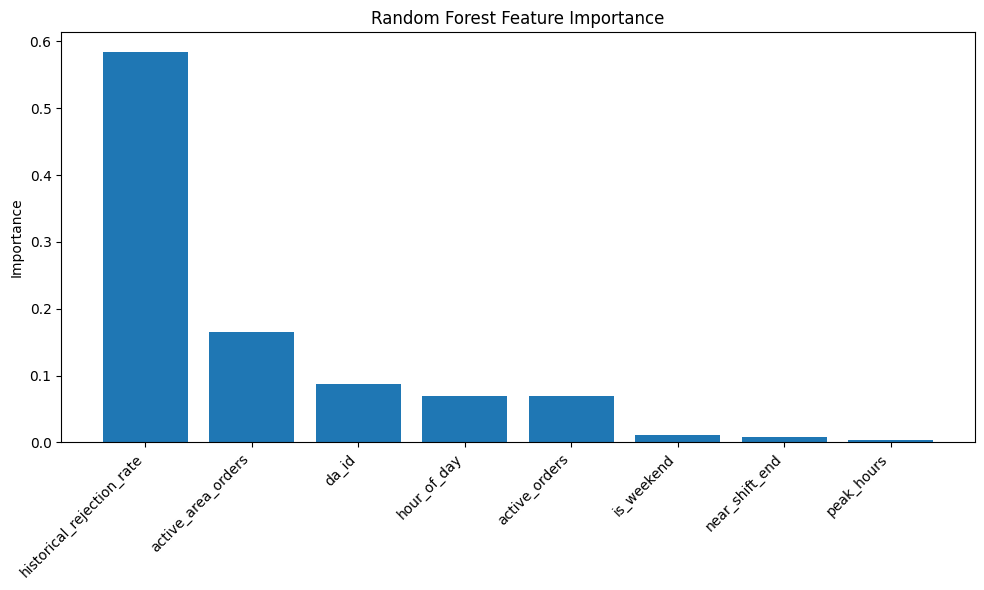

In [159]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

import matplotlib.pyplot as plt
import numpy as np

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, align="center", tick_label=sorted_feature_names)
plt.xticks(range(len(importances)), sorted_feature_names, rotation=45, ha='right')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

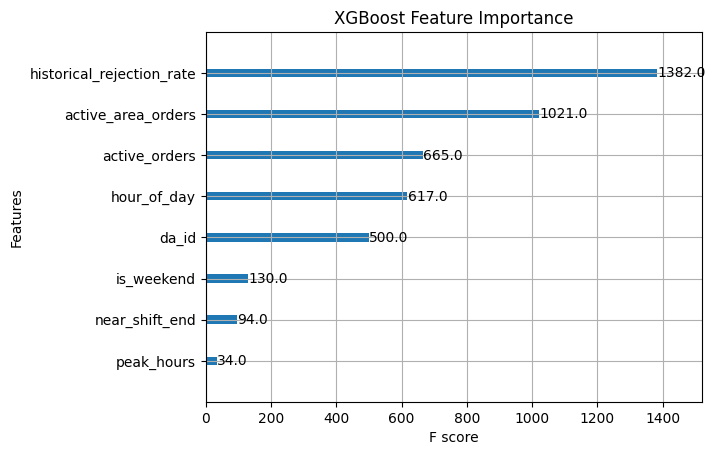

In [160]:
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.show()


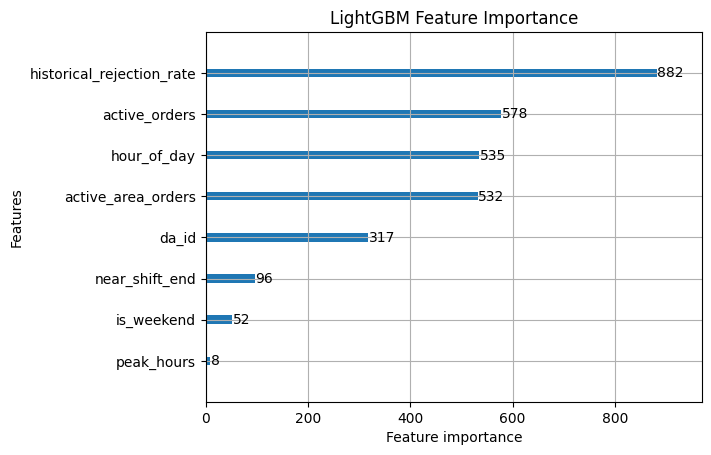

In [161]:
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split')
plt.title('LightGBM Feature Importance')
plt.show()


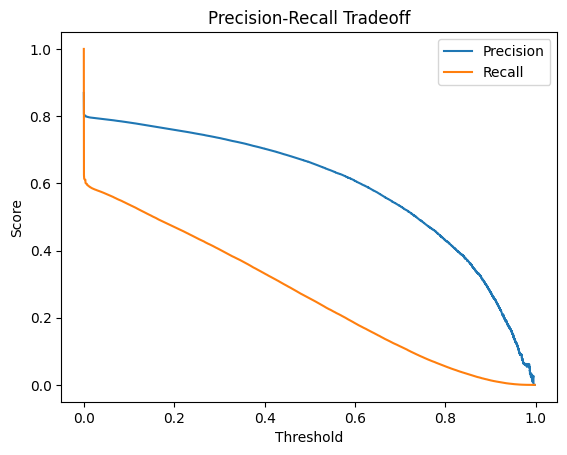

In [162]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the ensemble model
y_scores = ensemble_model.predict_proba(X_test)[:, 0]

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.show()


###### Optimal Threshold Search

In [140]:
from sklearn.metrics import f1_score

# Find the threshold that maximizes F1-score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)


Optimal Threshold: 0.9941648389962117


C:\Users\nadab\AppData\Local\Temp\ipykernel_5088\3522820608.py:4: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


In [141]:
# Predict using the new threshold
y_pred_adjusted = (y_scores >= optimal_threshold).astype(int)

# Evaluate with the adjusted threshold
print("Adjusted Classification Report:\n", classification_report(y_test, y_pred_adjusted))


Adjusted Classification Report:
               precision    recall  f1-score   support

           0       0.13      1.00      0.23     17159
           1       0.00      0.00      0.00    113710

    accuracy                           0.13    130869
   macro avg       0.07      0.50      0.12    130869
weighted avg       0.02      0.13      0.03    130869



In [123]:
from sklearn.metrics import f1_score

# Calculate F1-scores for all thresholds
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)  # Add a small value to avoid division by zero
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold for Best F1-Score:", optimal_threshold)
print("Best F1-Score:", f1_scores[optimal_idx])


Optimal Threshold for Best F1-Score: 1.6391441700476978e-05
Best F1-Score: 0.929842704333259


In [124]:
# Adjust predictions using the optimal threshold
y_pred_adjusted = (y_scores >= optimal_threshold).astype(int)

# Evaluate the model with the adjusted threshold
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))


C:\Users\nadab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nadab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nadab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     17159
           1       0.87      1.00      0.93    113710

    accuracy                           0.87    130869
   macro avg       0.43      0.50      0.46    130869
weighted avg       0.75      0.87      0.81    130869

Confusion Matrix:
 [[     0  17159]
 [     0 113710]]


In [163]:
# Set a lower threshold to improve recall for Class 0
threshold_class_0 = optimal_threshold - 0.05  # Lower the threshold slightly
y_pred_class_0_focus = (y_scores >= threshold_class_0).astype(int)

# Evaluate the new predictions
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (Class 0 Focus):\n", classification_report(y_test, y_pred_class_0_focus))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_0_focus))


Classification Report (Class 0 Focus):
               precision    recall  f1-score   support

           0       0.12      0.88      0.21     17159
           1       0.17      0.00      0.01    113710

    accuracy                           0.12    130869
   macro avg       0.14      0.44      0.11    130869
weighted avg       0.16      0.12      0.03    130869

Confusion Matrix:
 [[ 15148   2011]
 [113311    399]]


### Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression with class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
logreg.fit(X_train_under, y_train_under)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [165]:
# Predict on the test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities for Class 1

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.76      0.48     17159
           1       0.96      0.78      0.86    113710

    accuracy                           0.78    130869
   macro avg       0.65      0.77      0.67    130869
weighted avg       0.88      0.78      0.81    130869

ROC-AUC Score: 0.8619523659456014


In [166]:
# Extract coefficients
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


                     Feature  Coefficient
0              active_orders     0.049069
4                      da_id     0.028154
2                 is_weekend     0.021175
1                hour_of_day    -0.001842
5                 peak_hours    -0.045385
6         active_area_orders    -0.046155
7             near_shift_end    -0.450175
3  historical_rejection_rate    -8.386242


In [167]:
# Adjust the threshold for predictions
threshold = 0.4  # Set threshold to focus on recall for Class 0
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Evaluate with adjusted threshold
print("Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))


Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.38      0.67      0.49     17159
           1       0.94      0.84      0.89    113710

    accuracy                           0.82    130869
   macro avg       0.66      0.75      0.69    130869
weighted avg       0.87      0.82      0.84    130869



Prioritize precision if the goal is to minimize false alarms for rejections

Prioritize recall if missing a rejection is more costly

### Drivers' behavior analysis

In [142]:
# Convert dispatch_time to datetime if not already
all_waybill_df['dispatch_time'] = pd.to_datetime(all_waybill_df['dispatch_time'], unit='s')

# Get the last dispatch time per courier per day
courier_last_dispatch = all_waybill_df.groupby(['courier_id', 'dt'])['dispatch_time'].max().reset_index()
courier_last_dispatch.columns = ['courier_id', 'dt', 'last_dispatch_time']

# Merge last dispatch time back into the main DataFrame
all_waybill_df = pd.merge(all_waybill_df, courier_last_dispatch, on=['courier_id', 'dt'], how='left')


In [143]:
# Calculate time difference to the last dispatch time
all_waybill_df['time_to_shift_end'] = (
    all_waybill_df['last_dispatch_time'] - all_waybill_df['dispatch_time']
).dt.total_seconds()

# Flag dispatches occurring near the shift end (e.g., within 30 minutes)
all_waybill_df['near_shift_end'] = all_waybill_df['time_to_shift_end'].apply(
    lambda x: 1 if 0 <= x <= 1800 else 0  # 1800 seconds = 30 minutes
)


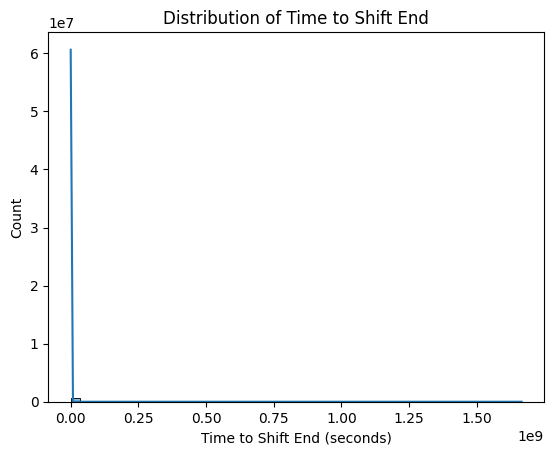

near_shift_end
0    0.879745
1    0.120255
Name: proportion, dtype: float64


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of time to shift end
sns.histplot(all_waybill_df['time_to_shift_end'], bins=50, kde=True)
plt.title("Distribution of Time to Shift End")
plt.xlabel("Time to Shift End (seconds)")
plt.show()

# Proportion of near_shift_end
print(all_waybill_df['near_shift_end'].value_counts(normalize=True))


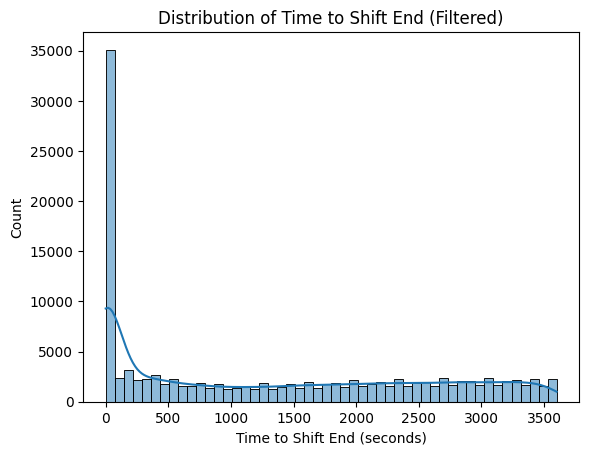

In [147]:
# Cap time_to_shift_end to a reasonable threshold (e.g., 1 hour = 3600 seconds)
all_waybill_df_new = all_waybill_df[all_waybill_df['time_to_shift_end'] <= 3600]

# Replot the distribution
sns.histplot(all_waybill_df_new['time_to_shift_end'], bins=50, kde=True)
plt.title("Distribution of Time to Shift End (Filtered)")
plt.xlabel("Time to Shift End (seconds)")
plt.show()


In [148]:
# Flag dispatches within 30 minutes of the shift end
all_waybill_df_new['near_shift_end'] = all_waybill_df_new['time_to_shift_end'].apply(
    lambda x: 1 if 0 <= x <= 1800 else 0
)

# Check the proportion of near_shift_end cases
print(all_waybill_df_new['near_shift_end'].value_counts(normalize=True))


near_shift_end
1    0.626477
0    0.373523
Name: proportion, dtype: float64


C:\Users\nadab\AppData\Local\Temp\ipykernel_5088\163663913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_waybill_df_new['near_shift_end'] = all_waybill_df_new['time_to_shift_end'].apply(


near_shift_end  is_courier_grabbed
0               1                     0.876277
                0                     0.123723
1               1                     0.814775
                0                     0.185225
Name: proportion, dtype: float64


C:\Users\nadab\AppData\Local\Temp\ipykernel_5088\853500916.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


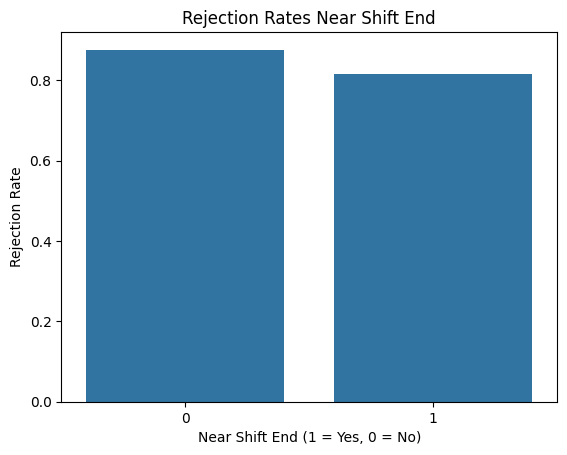

In [151]:
# Compare rejection rates for near_shift_end and non-near_shift_end cases
near_shift_rejections = all_waybill_df.groupby('near_shift_end')['is_courier_grabbed'].value_counts(normalize=True)
print(near_shift_rejections)

# Visualize rejection rates
sns.barplot(
    data=all_waybill_df,
    x='near_shift_end',
    y='is_courier_grabbed',
    ci=None
)
plt.title("Rejection Rates Near Shift End")
plt.xlabel("Near Shift End (1 = Yes, 0 = No)")
plt.ylabel("Rejection Rate")
plt.show()


near_shift_end  is_courier_grabbed
0               1                     0.860730
                0                     0.139270
1               1                     0.814775
                0                     0.185225
Name: proportion, dtype: float64


C:\Users\nadab\AppData\Local\Temp\ipykernel_5088\263352221.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


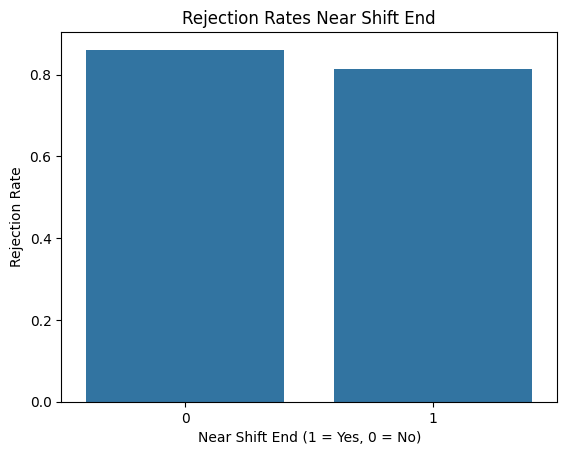

In [152]:
# Compare rejection rates for near_shift_end and non-near_shift_end cases
near_shift_rejections = all_waybill_df_new.groupby('near_shift_end')['is_courier_grabbed'].value_counts(normalize=True)
print(near_shift_rejections)

# Visualize rejection rates
sns.barplot(
    data=all_waybill_df_new,
    x='near_shift_end',
    y='is_courier_grabbed',
    ci=None
)
plt.title("Rejection Rates Near Shift End")
plt.xlabel("Near Shift End (1 = Yes, 0 = No)")
plt.ylabel("Rejection Rate")
plt.show()
